# Milestone Project 1: Food Vision Big

In [6]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [7]:
# pip install tensorflow==2.10.0


In [8]:
# # Downgrade Tensorflow Version (run this in Google Colab)
# !pip install tensorflow==2.4.1


In [9]:
tf.__version__

'2.13.0'

In [10]:
### The only GPU that is compatible with precision training as well as available on Google Colab is the GPU used in this notebbok: Tesla T4 ###

!nvidia-smi

zsh:1: command not found: nvidia-smi


In [11]:
!nvidia-smi -L

zsh:1: command not found: nvidia-smi


## Getting helper functions



In [20]:
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

!curl -O https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10246  100 10246    0     0   253k      0 --:--:-- --:--:-- --:--:--  256k


In [14]:
# !pip install wget

In [21]:
# Importing the helper_functions needed for this notebopk:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys, load_and_prep_image

## Using TensorFlow DataSets [(TFDS)](https://www.tensorflow.org/datasets/) overview to download Data:

 Read the TFDS's documentation: https://www.tensorflow.org/datasets/overview


In [22]:
# importing tensorflow datasets as tfds:
import tensorflow_datasets as tfds

In [23]:
### Listing all available Datasets: ###
datasets_list = tfds.list_builders() # Getting all available datasets in TFDS

### Checking if our target dataset is in the TFDS list created above:
print("food101" in datasets_list) # Is our target dataset in the list of TFDS datasets

2023-12-11 14:26:08.241660: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


True


In [24]:
# Load the data (it normally takes 5-6 min on Google Colab)
(train_data, test_data), ds_info = tfds.load(name = "food101",
                                             split = ["train", "validation"],
                                             shuffle_files = True,
                                             as_supervised = True, # Thanks to this, data gets returned in tuple format: (data, label)
                                             with_info = True)

## Exploring the Food101 data from TensorFLow Datsets

To become one with the data, we want to find:
* Class names
* The shape of our input data (image tensors)
* What the labels look like (i.e. are they one-hot encoded or label encoded?)
* Do the labels match up with the class names

In [25]:
# Features of Food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [26]:
# Getting the class names:
class_names = ds_info.features["label"].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [27]:
# Take one sample of the train data:
train_one_sample = train_data.take(1) # Samples are in format (image_tensor, label)

In [28]:
# What does one sample of our training data look like?
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [29]:
# Ouput info about our training sample:
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape} \n
  Image datatype: {image.dtype} \n
  Target class from Food101 (tensor form): {label} \n
  Class name (str form): {class_names[label.numpy()]}
  """)


  Image shape: (512, 512, 3) 

  Image datatype: <dtype: 'uint8'> 

  Target class from Food101 (tensor form): 21 

  Class name (str form): chocolate_cake
  


In [30]:
# What does our image tensor from TFDS Food101 look like?
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 32,  14,   0],
        [ 31,  13,   0],
        [ 28,  12,   0],
        ...,
        [ 54,  34,  10],
        [ 53,  33,   9],
        [ 51,  31,   7]],

       [[ 28,  10,   0],
        [ 28,  10,   0],
        [ 27,  11,   0],
        ...,
        [ 56,  36,  12],
        [ 55,  35,  11],
        [ 54,  34,   9]],

       [[ 30,  12,   0],
        [ 31,  13,   0],
        [ 31,  15,   0],
        ...,
        [ 58,  38,  13],
        [ 58,  38,  13],
        [ 58,  38,  11]],

       ...,

       [[135,  80,   0],
        [136,  81,   1],
        [137,  82,   2],
        ...,
        [ 13,   6,   0],
        [ 13,   6,   0],
        [ 13,   6,   0]],

       [[137,  82,   2],
        [137,  82,   2],
        [137,  82,   2],
        ...,
        [ 13,   6,   0],
        [ 13,   6,   0],
        [ 13,   6,   0]],

       [[136,  81,   1],
        [135,  80,   0],
        [135,  80,   0],
        ...,
        [ 14,   7,   

In [31]:
# What are the min and max values of our image tensor?
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

### Plot an image from TensorFlow DataSets:


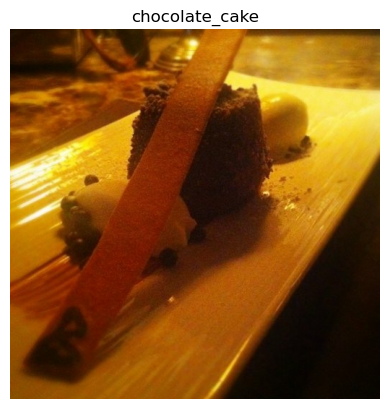

In [32]:
# PLot an image tensor
import matplotlib.pyplot as plt

plt.imshow(image) # Plotting image
plt.title(class_names[label.numpy()]) # Add title to image to verify the label is assosiated to the right image
plt.axis(False);

## Creating pre-processing functions for our data:

Neural Networks perform best when data is in a certain way (i.e. batched, normalized, etc...)

However, not all data (including data from TensorFlow DataSets) comes like this.

Therefore, in order for it to be ready for a neural network, we'll often have to write preprocessing functions and map it to our data.

What we know about our data:
* In `uint8` datatype
* Comprised of all different size tensors (different sized images)
* Not scaled (the pixel values are between 0 and 255, instead of 0 & 1)

What we know models like:
* Data in `float32` dtype (or for mixed precision `float16` and `float32`)
* For batches, TensorFlow, likes all of the tensors within a batch to be of the same size
* Scale (values between 0 and 1), also called normalized tensors generally perform better

These points give us a few things to tackle with a preprocessing function

**NOTE:** Since we'll use an EfficientNetBX pretrained model from tf.keras.applications, we don't need to rescale our data (these architectures have rescaling built-in)

This means our functions need to:
1. Reshape our images to all the same size
2. Convert the dtype of our tensors from uint8 to float32

In [ ]:
# Right now, before doing any preprocessing, our image shape is (image, label)

In [33]:
# make a function for preprocessing images:
def preprocess_img(image, label, img_shape = 224):
  """
  Converts image datatype from `uint8` to `float32` and reshapes
  image to [img_shape, img_shape, colour_channels]
  """
  image = tf.image.resize(image, [img_shape, img_shape]) # reshape target image
  # image = image/255. # Scale (NORMALIZE) image values (NOT REQUIRED FOR EFFICIENTNETBX MODELS)
  return tf.cast(image, tf.float32), label # returning (float32_image, label). This is a tuple!!!


In [34]:
### What we are doing here is changing the shape of the image and the data type ###
### We are not yet normalizing the data###

# Preprocess a single sample image and check the outputs:
preprocessed_img = preprocess_img(image, label)[0]
print(f"""Image before preprocessing: \n {image[:2]}..., \n
          Shape: {image.shape} \n
          Datatype: {image.dtype} \n)
       """) # Only getting the first 2 indexes so it doesn't output to much

print(f"""Image after preprocessing: \n {preprocessed_img[:2]}..., \n
          Shape: {preprocessed_img.shape} \n
          Datatype: {preprocessed_img.dtype} \n
       """)

Image before preprocessing: 
 [[[32 14  0]
  [31 13  0]
  [28 12  0]
  ...
  [54 34 10]
  [53 33  9]
  [51 31  7]]

 [[28 10  0]
  [28 10  0]
  [27 11  0]
  ...
  [56 36 12]
  [55 35 11]
  [54 34  9]]]..., 

          Shape: (512, 512, 3) 

          Datatype: <dtype: 'uint8'> 
)
       
Image after preprocessing: 
 [[[29.19898    11.198979    0.        ]
  [28.285715   12.285714    0.        ]
  [30.852041   15.494898    0.28061217]
  ...
  [52.9336     32.505074    8.7193365 ]
  [54.025528   34.025528   10.025528  ]
  [53.800972   33.800972    9.571359  ]]

 [[33.09694    15.096939    1.193878  ]
  [33.785713   17.785715    2.785715  ]
  [31.785713   16.428572    1.2142859 ]
  ...
  [63.60206    42.530632   15.346998  ]
  [61.647934   40.7857     13.928558  ]
  [60.785713   41.714287   12.020403  ]]]..., 

          Shape: (224, 224, 3) 

          Datatype: <dtype: 'float32'> 

       


In [ ]:
# Our images are not yet in batches

## Batch & prepare datasets

This will make our data input run much faster.

Check the documentation for more info: https://www.tensorflow.org/guide/data_performance

In [35]:
 # Maping preprocessing function to training (AND parallelize)
train_data = train_data.map(map_func = preprocess_img, num_parallel_calls = tf.data.AUTOTUNE)

 # Suffleing train_data and turn it into batches and prefect it (load it faster)
 ### NOTE: buffer size is 1k, in order for our our machines to be able to store it in one go ###
 ### NOTE: what buffering does is shuffeling data before every epoch. This prevents our model from overfitting ###
train_data = train_data.shuffle(1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

 # Doing the same fir the testing data:

 # Maping preprocesing fucntion for testing (AND parallelize)
test_data = test_data.map(map_func = preprocess_img, num_parallel_calls = tf.data.AUTOTUNE) ### What "num_parallel_calls and data.AUTOTUNE" does is: Finding outhow many processing uits the machine has and use as many as possible
 # Suffleing test_data AND turning it into batches. Then perfecting it (to make it load faster)
test_data = test_data.shuffle(1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE).cache()


What this does is to map this processing function ("preprocess_img") across our training dataset, then shuffle a number of elements and then batch them together. Finally make sure we prepare new batches (prefetch) whilst the model is looking through (finding patterns) the current batch.

In [36]:
# Checking how our datasets look like after prparing them (batching):
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <CacheDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Creating Modeling Callbacks

Creating a couple of callbacks to help us while our model trains:
* Tensorboard callback: To log trainig results (so we can visualize them later if needed)
* ModelCheckpoint callback: To save our model's progress after feature extraction

In [37]:
# Imporrting tensorflow callback fucntion from helper functions
from helper_functions import create_tensorboard_callback

# Create ModelCheckpoint callback to save our model's progress:
# We save the weights instead of the whole model, so it takes less space and time to run
checkpoint_path = "model_checkpoints/cp.ckpt" # we are required to add .ckpt in order to save the weights!!!
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, # This saves the model's weights with the best
                                                      monitor = "val_accuracy",
                                                      save_best_only = True,
                                                      save_weihghts_only = True,
                                                      verbose = 0)

## Setup mixed precision training

For deeper understanding of precision training check out the following guide:

https://www.tensorflow.org/guide/mixed_precision

Mixed precision uses a mixt of float32 and float16 data types to speed up model performance


In [38]:
# Turn on mixed precision training:
from tensorflow.keras import mixed_precision

# This tells Tensorflow: "For any part of Neural network that can use mixed precision or float16 do so"
mixed_precision.set_global_policy("mixed_float16") # This sets global data policy to mixed precision


The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [39]:
mixed_precision.global_policy()

<Policy "mixed_float16">

## Building Feature Extraction Model:

In [40]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False # We don't want to train the base model, since it's been trained already

# Creating functional model:
inputs = layers.Input(shape = input_shape, name = "input_layer")
### NOTE: EfficientNetBX models have rescaling built-in, but if it using another one, we can add the line down below:
# x = preprocessing.Rescaling(1/255)(x)

x = base_model(inputs) # Making sure layers that should be in inference only stay like that
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax",
                            dtype = tf.float32,
                            name = "softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)


# Compiling model:

### NOTE: If our labels are one hard encoded, then we need to use CategorialCcrossentropy, otherwise if our labels are in integer form (our case) then we use SparceCategoricalCrossentropy
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

16705208/16705208 [==============================] - 2s 0us/step


In [41]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                             

## Checking layer dtype policies to see if we're using mixed precision

In [42]:
for layers in model.layers:
  print(layers.name, layers.trainable, layers.dtype, layers.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


Going through the above we see:
* `layers.name`: The human readable name of a particular layer
* `layers.trainable`: Is the layer trainable or not (if `False`, the weights are frozen)
* `layers.dtype`: The data type stores its variables in (`float32` or `float16`)
* `layers.dtype_policy`: The data type policy a layer computes on its variables with

In [43]:
# Check the same attributes from the previous cell, but for out base model (EfficientNetB0)
for layers in model.layers[1].layers[:20]: # Checking the layers of the base model (layer at index 1 of `model`) AND then we only visualize the first 20!!!
  print(layers.name, layers.trainable, layers.dtype, layers.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <

In [ ]:
# # SAME AS ABOVE
# for layers in base_model.layers:
#   print(layers.name, layers.trainable, layers.dtype, layers.dtype_policy)

In [ ]:
# This tells us the Global Policy:
mixed_precision.global_policy()

## Fit the feature extraction model:

If our goal is to fine-tune a pretrained model, the general order of doing things is:
1. Building a feature extraction model (train a couple of output layers with base layers frozen)
2. Fine-tune some of the frozen layers

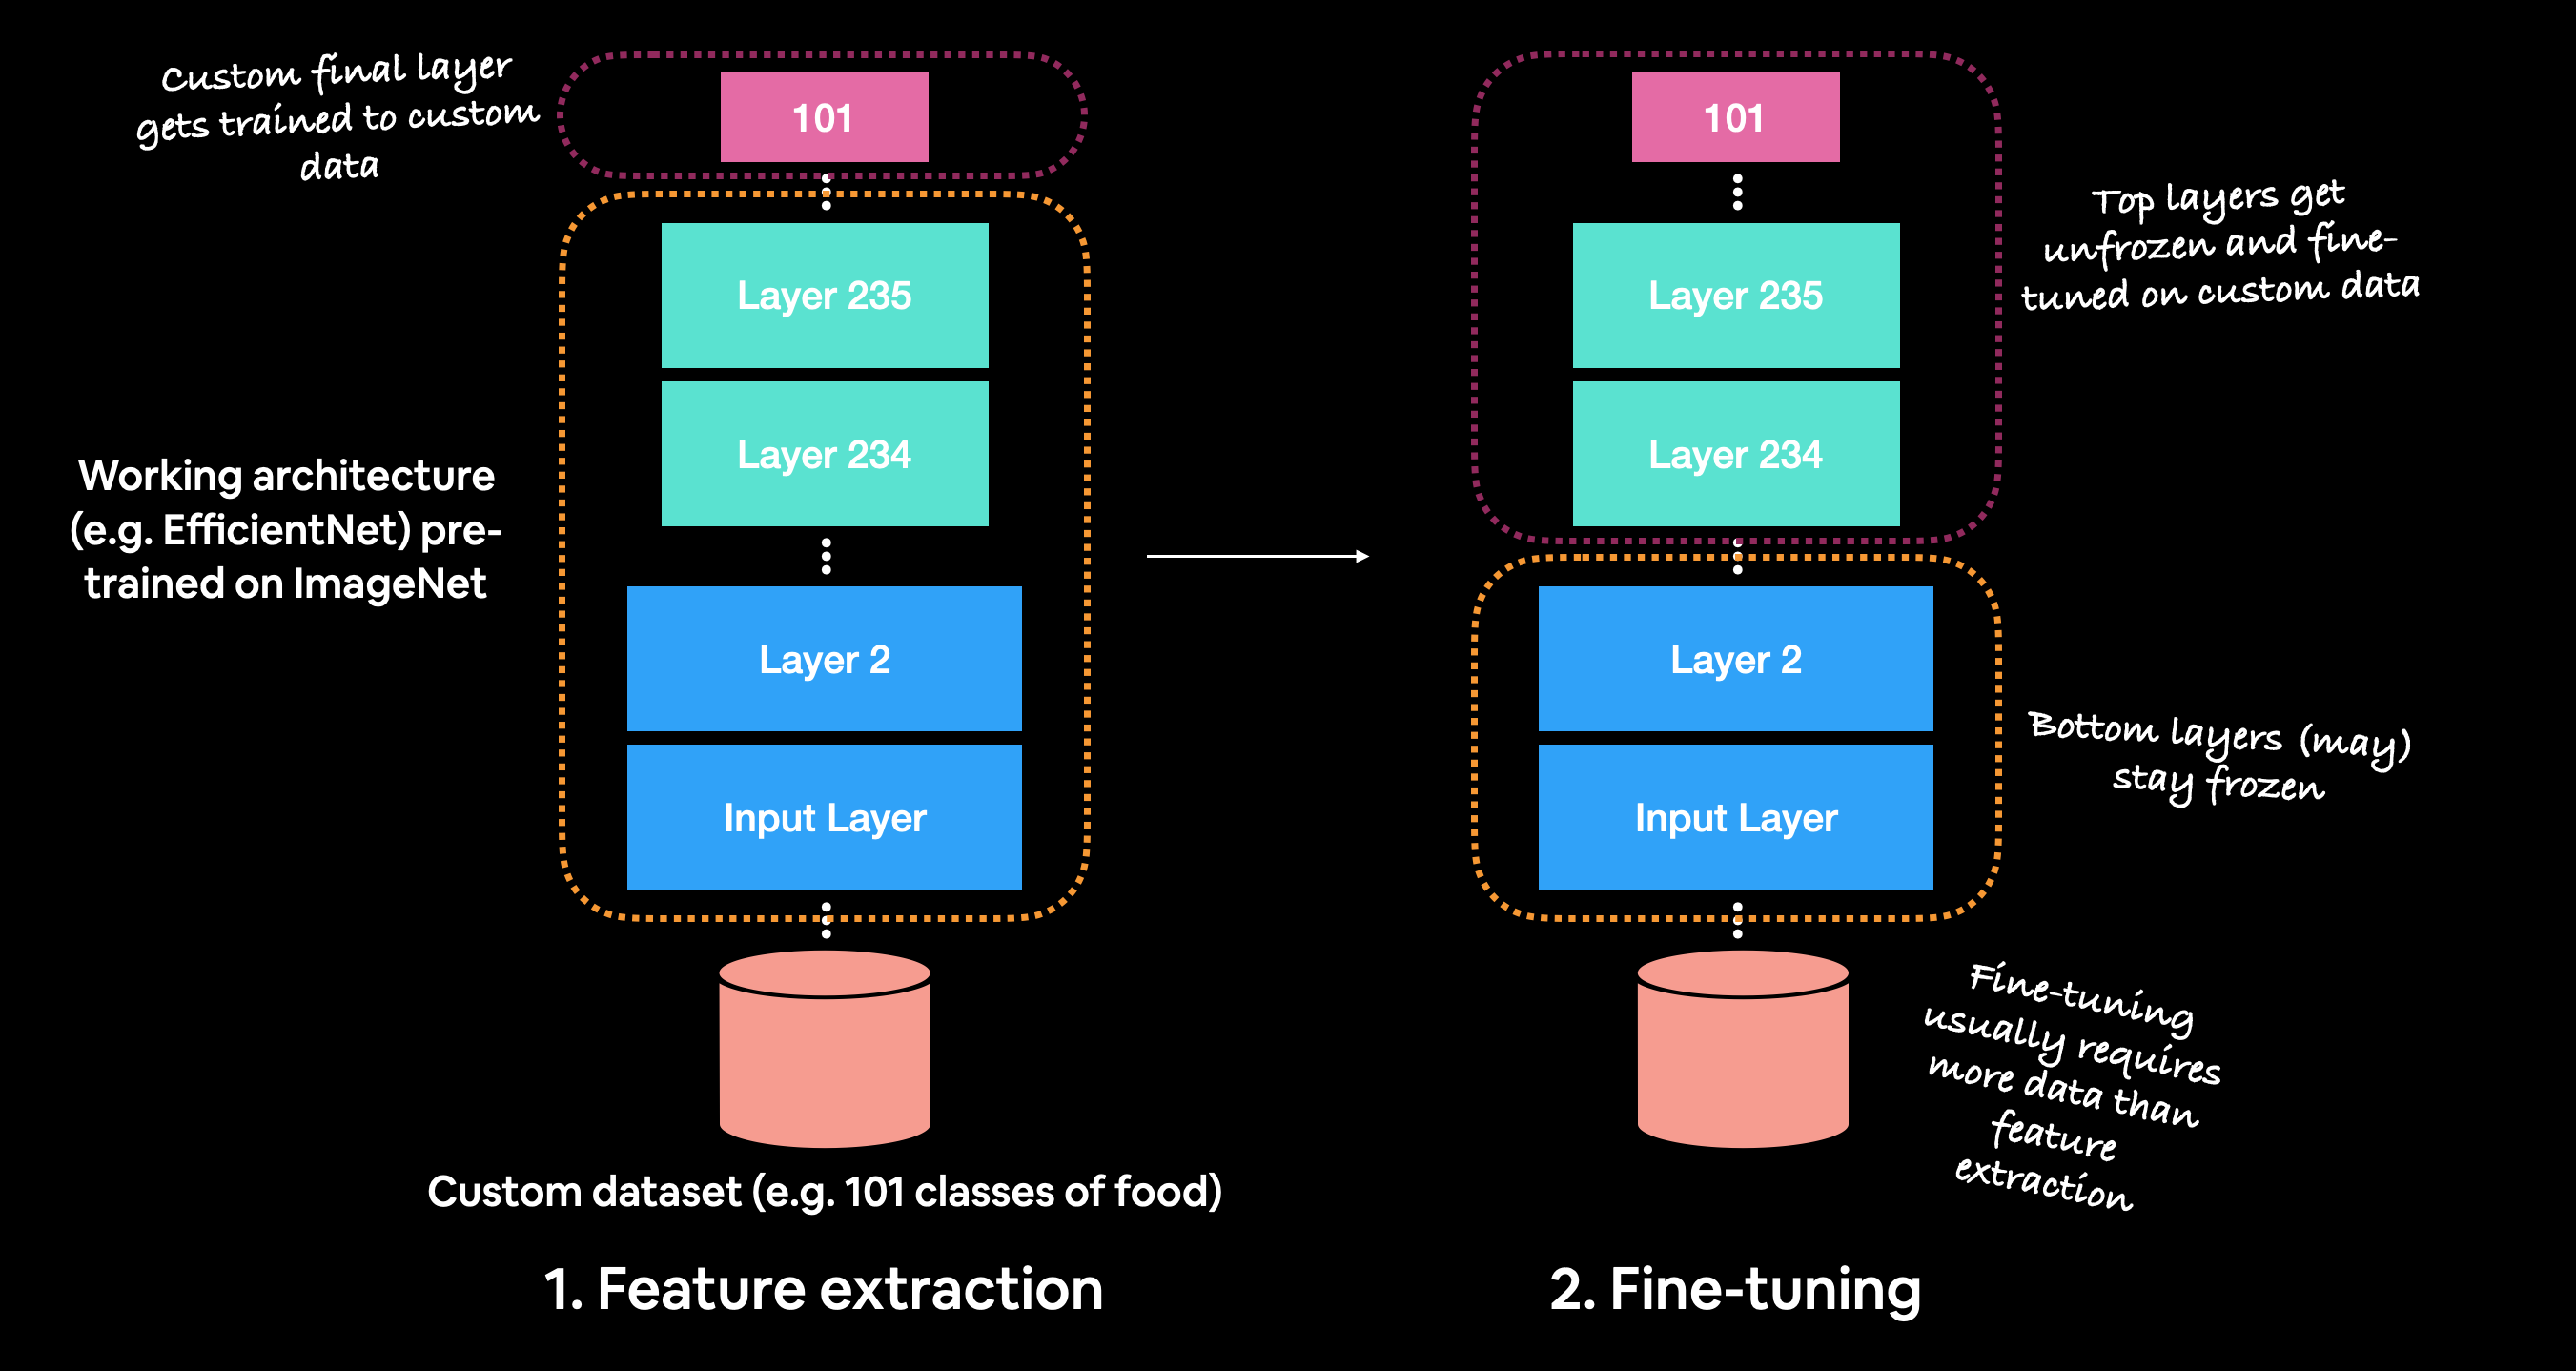


In [ ]:
# !pip install tensorflow==2.4.1

In [ ]:
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
#                                                   patience = 3)

In [44]:
from datetime import datetime


## Fitting the Feature Extraction Model

* 3 epochs should be enough for the top layers to adjust their weights to our food image data
* In order to save time per epoch, it's better to validate on 15% of the data

*   List item
*   List item



In [45]:
# Turning off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Adjustign TensorBoard Callback
tensorboard_callback = create_tensorboard_callback(dir_name="training_logs",
                                                   experiment_name="efficientnetb0_101_classes_all_data_feature_extract")

history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[tensorboard_callback, model_checkpoint])

# # Fit the feature extraction model with callbacks:
# history_101_food_classes_feature_extract = model.fit(train_data,
#                                                      epochs=3,
#                                                      steps_per_epoch = len(train_data),
#                                                      validation_data = test_data,
#                                                      validation_steps = int(0.15 * len(test_data)),
#                                                      callbacks = [create_tensorboard_callback(dir_name = "training_logs",
#                                                                                               experiment_name = "efficientnetb0_101_classes_all_data_feature_extract"),
#                                                                   model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20231211-142722
Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0099

2023-12-11 14:37:11.128521: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


2368/2368 [==============================] - 603s 253ms/step - loss: nan - accuracy: 0.0099 - val_loss: nan - val_accuracy: 0.0069
Epoch 2/3
2368/2368 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0099

2023-12-11 14:47:07.331659: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


2368/2368 [==============================] - 598s 253ms/step - loss: nan - accuracy: 0.0099 - val_loss: nan - val_accuracy: 0.0077
Epoch 3/3
2368/2368 [==============================] - 573s 242ms/step - loss: nan - accuracy: 0.0099 - val_loss: nan - val_accuracy: 0.0074


2023-12-11 14:56:56.661636: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [46]:
# Evaluate model on the whole test dataset:
results_fetaure_extraction_model = model.evaluate(test_data)
results_fetaure_extraction_model  # Evaluating on all the 101 classes!!!

790/790 [==============================] - 191s 242ms/step - loss: nan - accuracy: 0.0099


[nan, 0.009900989942252636]

## Challenge:

* Complete the TEMPLATE version of 07 to obtain a computer vision model (building off the one we've built in this notebook) to beat the DeepFood paper.
* In other words we're building Food Vision BIG!

**NOTEBOOKS TO CHECK OUT**
* [Notebook #6](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/06_transfer_learning_in_tensorflow_part_3_scaling_up.ipynb)
* [Template Notebook #7](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/TEMPLATE_07_food_vision_milestone_project_1.ipynb)



In [ ]:
# # pip install pyyaml h5py  # Required to save models in HDF5 format

# import os

# import tensorflow as tf
# from tensorflow import keras

# print(tf.version.VERSION)

In [50]:
# from google.colab import drive
# drive.mount('/gdrive')


In [48]:
model.save("/Users/rogerlbcn/Documents/ML_Projects/101_Food_Classes_TensorFlow")

In [ ]:
### Saving the model to Google Drive: ###

# Saving our model to drive so it can be used later:
# model.save("drive/My Drive/TensorFlow_Course/101_food_classes_milestone_project/101_food_classes_milestone_project_15_percent")

In [49]:
# Retrieving previously saved model:
saved_model_15_percent = tf.keras.models.load_model('/Users/rogerlbcn/Documents/ML_Projects/101_Food_Classes_TensorFlow')


In [51]:
# Checking layers in the base model and chekcing what data type policy they use:
print(model.dtype_policy)
print(saved_model_15_percent.dtype_policy)

<Policy "mixed_float16">
<Policy "mixed_float16">


In [52]:
for layers in model.layers[1].layers[:20]:
  print(layers.name, layers.trainable, layers.dtype, layers.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <

In [53]:
for layers in saved_model_15_percent.layers[1].layers[:20]:
  print(layers.name, layers.trainable, layers.dtype, layers.dtype_policy)

input_1 True float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <P

In [54]:
# Evaluating saved model on test_data. This should give us very similar results to the original model, which is the case.
results_extraction_model_saved = saved_model_15_percent.evaluate(test_data)

790/790 [==============================] - 209s 263ms/step - loss: nan - accuracy: 0.0099


In [55]:
results_feature_extract_model_original = model.evaluate(test_data)

790/790 [==============================] - 210s 266ms/step - loss: nan - accuracy: 0.0099


## Preparing our model's layers for fine-tuning:
1. Load and evaluate downloaded GS model
2. Get summary and evaluate downloaded GS model
3. Check GS model performance (evaluating it on the test dataset)
4. Set all the layers trainable variable in the model to True (this way we make sure they are unfrozen)
5. Check what dtype_policy the layers in this model have

In [56]:
### Mounting Google Drive (connecting notebook to Drive) ###

# from google.colab import drive
# drive.mount('/gdrive')

In [58]:

# Retrieving previously saved model:
saved_model_15_percent = tf.keras.models.load_model('/Users/rogerlbcn/Documents/ML_Projects/101_Food_Classes_TensorFlow')


In [59]:
# Download the saved model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip

# Unzip the SavedModel downloaded from Google Stroage
!mkdir downloaded_gs_model # create new dir to store downloaded feature extraction model
!unzip 07_efficientnetb0_feature_extract_model_mixed_precision.zip -d downloaded_gs_model

zsh:1: command not found: wget
unzip:  cannot find or open 07_efficientnetb0_feature_extract_model_mixed_precision.zip, 07_efficientnetb0_feature_extract_model_mixed_precision.zip.zip or 07_efficientnetb0_feature_extract_model_mixed_precision.zip.ZIP.


In [61]:
# Definig path to the saved model:
model_path = "downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision"

# Load GS model:
gs_model = tf.keras.models.load_model(model_path)

# Get summary of loaded model:
gs_model.summary()

OSError: No file or directory found at /Users/rogerlbcn/Downloads/downloaded_gs_modeln

In [ ]:
saved_model_15_percent.summary()

In [ ]:
saved_model_15_percent.evaluate(test_data)

In [ ]:
# Unfreeze all trainable layers (setting all layers.trainable = True):
saved_model_15_percent.trainable = True



In [ ]:
saved_model_15_percent.summary()

In [ ]:
# Checking what dtype of layers the loaded model has:

for layers in saved_model_15_percent.layers:
  print(layers.name, layers.trainable, layers.dtype, layers.dtype_policy)

In [ ]:
# Set up Early Stopping callback for stopping the model in case the model's val_loss doesn't imporve for 3 epochs
# Also, monitor val_loss and stop training if it does not imporoev after 3 epochs
# Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping for more

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience = 3)

In [ ]:
# Creating ModelCheckpoint callback (saving the best model during fine-tuning)
# Also, monitor val_loss while training and saving the best model, the one with the lowest val_loss!!!
# Docuentation: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

checkpoint_path = "fine_tuned_model/checkpoints/cp.ckpt"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor = 'val_loss',
                                                      save_best_only = True)

In [ ]:
saved_model_15_percent.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,       # using sparce_categorical_crossentropy
                               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), # setting a learning_rate 10x lower than the default one, becuase we're using fine-tining
                               metrics = ['accuracy'])

In [ ]:
# pip install wandb
import wandb
from wandb.keras import WandbCallback



## Fine-tuning

In [ ]:
### Fine-tuning: ###

# Initialize wandb
wandb.init()

# Setting the fine tuned epochs
fine_tune_epochs = 100 ### FINE TUNE FOR A MAXIMUM OF 100 EPOCHS!!!

# Fiting model:
history_saved_model_fine_tuned = saved_model_15_percent.fit(train_data,
                                                            epochs = fine_tune_epochs, # 100 epochs
                                                            validation_data = test_data,
                                                            validation_steps = int(0.15 * len(test_data)), # Validating for 15% of data
                                                            callbacks = [early_stopping,
                                                                         model_checkpoint,
                                                                         create_tensorboard_callback("training_logs",
                                                                                                    "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                         WandbCallback()])



In [ ]:
# Save model on Google Drive:
# saved_model_15_percent_fine_tuned.save('/content/drive/My Drive/TensorFlow_Course/101_food_classes_milestone_project/101_food_classes_milestone_project_15_percent')

saved_model_15_percent_fine_tuned = saved_model_15_percent.save('/content/drive/My Drive/TensorFlow_Course/101_food_classes_milestone_project/101_food_classes_milestone_project_15_percent_fine_tuned')


In [ ]:
# Load model:
saved_model_15_percent_fine_tuned = tf.keras.models.load_model('/content/drive/My Drive/TensorFlow_Course/101_food_classes_milestone_project/101_food_classes_milestone_project_15_percent_fine_tuned')


In [ ]:
saved_model_15_percent_fine_tuned.evaluate(test_data) # This should beat the paper's (DeepFood) 77.4% top-1 accuracy

In [ ]:
saved_model_15_percent_fine_tuned.summary()

# Evaluate the trained model

1. Find the precision, recall and f1 scores for each class (all 101).
2. Build a confusion matrix for each of the classes.
3. Find your model's most wrong predictions (those with the highest prediction probability but the wrong prediction).
